In [134]:
use_intermediate_results = False

In [146]:
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://www.basketball-reference.com/teams/'
html = requests.get(url).content
df_list = pd.read_html(html)
tames = df_list[0]

    Lg -- League  From -- First year  To -- Last year  G -- Games  W -- Wins  L -- Losses  
    W/L% -- Win-Loss Percentage  Plyfs -- Years team made the playoffs  
    Div -- Years team finished first (or tied for first) in the division  
    Conf -- Years team won the conference championship  Champ -- Years team won the league championship

In [3]:
tames

,Franchise,Lg,From,To,Yrs,G,W,L,W/L%,Plyfs,Div,Conf,Champ
0,Atlanta Hawks,NBA,1950,2019,70,5552,2746,2806,0.495,46,11,0,1
1,Atlanta Hawks,NBA,1969,2019,51,4134,2048,2086,0.495,33,5,0,0
2,St. Louis Hawks,NBA,1956,1968,13,1005,553,452,0.550,12,6,0,1
3,Milwaukee Hawks,NBA,1952,1955,4,281,91,190,0.324,0,0,0,0
4,Tri-Cities Blackhawks,NBA,1950,1951,2,132,54,78,0.409,1,0,0,0
5,Boston Celtics,NBA/BAA,1947,2019,73,5724,3378,2346,0.590,56,31,9,17
6,Brooklyn Nets,NBA/ABA,1968,2019,52,4222,1824,2398,0.432,27,5,2,2
7,Brooklyn Nets,NBA,2013,2019,7,574,242,332,0.422,4,0,0,0
8,New Jersey Nets,NBA,1978,2012,35,2822,1186,1636,0.420,16,4,2,0
9,New York Nets,NBA,1977,1977,1,82,22,60,0.268,0,0,0,0


In [4]:
team_l = list(tames[tames.To==2019].Franchise.unique())

In [5]:
teams_d = {}
for team in team_l:
    name = team.split(' ')
    if len(name) == 2:
        abb = name[0][:3].upper()
    else:
        abb = ''
        for word in name:
            abb += word[0].upper()
    team_name = '_'.join(name)
    teams_d[team_name] = abb

In [6]:
teams_d['Oklahoma_City_Thunder'] = 'OKC'
teams_d['Brooklyn_Nets'] = 'NJN'
teams_d['Charlotte_Hornets'] = 'CHO'
teams_d['Brooklyn_Nets'] = 'BRK'
teams_d['Portland_Trail_Blazers'] = 'POR'
teams_d

{'Atlanta_Hawks': 'ATL',
 'Boston_Celtics': 'BOS',
 'Brooklyn_Nets': 'BRK',
 'Charlotte_Hornets': 'CHO',
 'Chicago_Bulls': 'CHI',
 'Cleveland_Cavaliers': 'CLE',
 'Dallas_Mavericks': 'DAL',
 'Denver_Nuggets': 'DEN',
 'Detroit_Pistons': 'DET',
 'Golden_State_Warriors': 'GSW',
 'Houston_Rockets': 'HOU',
 'Indiana_Pacers': 'IND',
 'Los_Angeles_Clippers': 'LAC',
 'Los_Angeles_Lakers': 'LAL',
 'Memphis_Grizzlies': 'MEM',
 'Miami_Heat': 'MIA',
 'Milwaukee_Bucks': 'MIL',
 'Minnesota_Timberwolves': 'MIN',
 'New_Orleans_Pelicans': 'NOP',
 'New_York_Knicks': 'NYK',
 'Oklahoma_City_Thunder': 'OKC',
 'Orlando_Magic': 'ORL',
 'Philadelphia_76ers': 'PHI',
 'Phoenix_Suns': 'PHO',
 'Portland_Trail_Blazers': 'POR',
 'Sacramento_Kings': 'SAC',
 'San_Antonio_Spurs': 'SAS',
 'Toronto_Raptors': 'TOR',
 'Utah_Jazz': 'UTA',
 'Washington_Wizards': 'WAS'}

In [7]:
url = 'https://www.basketball-reference.com/players/j/jamesle01/gamelog/2004/'
html = requests.get(url).content
df_list = pd.read_html(html)
lebron_james = df_list[-1]

    Rk -- Rank  G -- Season Game  Age -- Age of Player at the start of February 1st of that season.  Tm -- Team
    Opp -- Opponent  GS -- Games Started  MP -- Minutes Played  FG -- Field Goals  FGA -- Field Goal Attempts
    FG% -- Field Goal Percentage  3P -- 3-Point Field Goals  3PA -- 3-Point Field Goal Attempts  
    3P% -- 3-Point Field Goal Percentage  FT -- Free Throws  FTA -- Free Throw Attempts  
    FT% -- Free Throw Percentage  ORB -- Offensive Rebounds  DRB -- Defensive Rebounds  TRB -- Total Rebounds  
    AST -- Assists  STL -- Steals  BLK -- Blocks  TOV -- Turnovers  PF -- Personal Fouls  PTS -- Points  
    GmSc -- Game Score  +/- -- Plus/Minus

In [13]:
lebron_james

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2003-10-29,18-303,CLE,@,SAC,L (-14),1,42:00,...,4,6,9,4,0,2,3,25,24.7,-9
1,2,2,2003-10-30,18-304,CLE,@,PHO,L (-9),1,41:00,...,10,12,8,1,0,7,1,21,14.7,-3
2,3,3,2003-11-01,18-306,CLE,@,POR,L (-19),1,39:00,...,4,4,6,2,0,2,3,8,5.0,-21
3,4,4,2003-11-05,18-310,CLE,NaN,DEN,L (-4),1,41:00,...,9,11,7,2,3,2,1,7,11.2,-3
4,5,5,2003-11-07,18-312,CLE,@,IND,L (-1),1,44:00,...,5,5,3,0,0,7,2,23,9.0,-7
5,6,6,2003-11-08,18-313,CLE,NaN,WAS,W (+13),1,45:00,...,3,8,9,1,1,2,1,17,15.7,+14
6,7,7,2003-11-10,18-315,CLE,NaN,NYK,W (+14),1,34:00,...,4,5,4,1,1,2,0,17,15.8,+20
7,8,8,2003-11-12,18-317,CLE,@,MIA,L (-5),1,42:00,...,2,3,7,2,1,4,3,18,12.8,-4
8,9,9,2003-11-14,18-319,CLE,@,BOS,L (-9),1,35:00,...,4,5,3,0,0,4,3,10,0.8,-1
9,10,10,2003-11-15,18-320,CLE,NaN,PHI,W (+3),1,47:00,...,5,5,8,1,2,5,2,22,15.6,+8


In [122]:
url = 'https://www.basketball-reference.com/teams/LAL/2019_games.html'
html = requests.get(url).content
df_list = pd.read_html(html)
lakers = df_list[0]

In [123]:
lakers[lakers.G=='G'].index

Int64Index([20, 41, 62, 83], dtype='int64')

In [124]:
lakers.drop(lakers[lakers.G=='G'].index, inplace=True )

In [125]:
lakers.reset_index(drop=True, inplace=True)

In [126]:
lakers

,G,Date,Start (ET),Unnamed: 3,Unnamed: 4,Unnamed: 5,Opponent,Unnamed: 7,Unnamed: 8,Tm,Opp,W,L,Streak,Notes
0,1,"Thu, Oct 18, 2018",10:30p,NaN,Box Score,@,Portland Trail Blazers,L,NaN,119,128,0,1,L 1,NaN
1,2,"Sat, Oct 20, 2018",10:30p,NaN,Box Score,NaN,Houston Rockets,L,NaN,115,124,0,2,L 2,NaN
2,3,"Mon, Oct 22, 2018",10:30p,NaN,Box Score,NaN,San Antonio Spurs,L,OT,142,143,0,3,L 3,NaN
3,4,"Wed, Oct 24, 2018",10:00p,NaN,Box Score,@,Phoenix Suns,W,NaN,131,113,1,3,W 1,NaN
4,5,"Thu, Oct 25, 2018",10:30p,NaN,Box Score,NaN,Denver Nuggets,W,NaN,121,114,2,3,W 2,NaN
5,6,"Sat, Oct 27, 2018",8:30p,NaN,Box Score,@,San Antonio Spurs,L,NaN,106,110,2,4,L 1,NaN
6,7,"Mon, Oct 29, 2018",8:00p,NaN,Box Score,@,Minnesota Timberwolves,L,NaN,120,124,2,5,L 2,NaN
7,8,"Wed, Oct 31, 2018",10:30p,NaN,Box Score,NaN,Dallas Mavericks,W,NaN,114,113,3,5,W 1,NaN
8,9,"Sat, Nov 3, 2018",10:00p,NaN,Box Score,@,Portland Trail Blazers,W,NaN,114,110,4,5,W 2,NaN
9,10,"Sun, Nov 4, 2018",9:30p,NaN,Box Score,NaN,Toronto Raptors,L,NaN,107,121,4,6,L 1,NaN


    G -- Games
    Start (ET) -- Time zone = ET
    Tm -- Points
    Opp -- Opponent Points
    W -- Wins
    L -- Losses

In [11]:
years = [2019,2018,2017,2016,2015]
seasons = {}
to_num_list = ['W', 'L']
for year in years:
    seasons[year]={}
    for name, add in teams_d.items():
        url = 'https://www.basketball-reference.com/teams/' + add + '/' + str(year) + '_games.html'
        html = requests.get(url).content
        df_list = pd.read_html(html)
        df = df_list[0]
        df.drop(df[df.G=='G'].index, inplace=True)
        df.reset_index(drop=True, inplace=True)
        df['Opponent'] = df.Opponent.map(lambda x: '_'.join(x.split(' ')))
        df['Date'] = df.Date.map(lambda x: ''.join(str(pd.to_datetime(x)).split(' ')[0].split('-')))
        df.drop(df.columns[[3, 4]], axis=1, inplace=True)
        df.rename(columns = {'Unnamed: 5':'Guest','Unnamed: 7':'Win_or_Lose','Unnamed: 8':'OverTime'}, inplace=True)
        df[to_num_list] = df[to_num_list].apply(pd.to_numeric)
        seasons[year][name] = df


In [10]:
seasons[2019]['Los_Angeles_Lakers']

,G,Date,Start (ET),Guest,Opponent,Win_or_Lose,OverTime,Tm,Opp,W,L,Streak,Notes
0,1,20181018,10:30p,@,Portland_Trail_Blazers,L,NaN,119,128,0,1,L 1,NaN
1,2,20181020,10:30p,NaN,Houston_Rockets,L,NaN,115,124,0,2,L 2,NaN
2,3,20181022,10:30p,NaN,San_Antonio_Spurs,L,OT,142,143,0,3,L 3,NaN
3,4,20181024,10:00p,@,Phoenix_Suns,W,NaN,131,113,1,3,W 1,NaN
4,5,20181025,10:30p,NaN,Denver_Nuggets,W,NaN,121,114,2,3,W 2,NaN
5,6,20181027,8:30p,@,San_Antonio_Spurs,L,NaN,106,110,2,4,L 1,NaN
6,7,20181029,8:00p,@,Minnesota_Timberwolves,L,NaN,120,124,2,5,L 2,NaN
7,8,20181031,10:30p,NaN,Dallas_Mavericks,W,NaN,114,113,3,5,W 1,NaN
8,9,20181103,10:00p,@,Portland_Trail_Blazers,W,NaN,114,110,4,5,W 2,NaN
9,10,20181104,9:30p,NaN,Toronto_Raptors,L,NaN,107,121,4,6,L 1,NaN


In [104]:
years = range(2015,2019)
team_schedules = {}
to_num_list = ['G', 'W', 'L', 'Tm', 'Opp']
for name, add in teams_d.items():
    team_schedules[name] = pd.DataFrame()
    for year in years:
        url = 'https://www.basketball-reference.com/teams/' + add + '/' + str(year) + '_games.html'
        html = requests.get(url).content
        df_list = pd.read_html(html)
        df = df_list[0]
        df.drop(df[df.G=='G'].index, inplace=True)
        df.reset_index(drop=True, inplace=True)
        df['Opponent'] = df.Opponent.map(lambda x: '_'.join(x.split(' ')))
        df['Date'] = df.Date.map(lambda x: ''.join(str(pd.to_datetime(x)).split(' ')[0].split('-')))
        df.drop(df.columns[[3, 4]], axis=1, inplace=True)
        df.rename(columns = {'Unnamed: 5':'Guest','Unnamed: 7':'Win_or_Lose','Unnamed: 8':'OverTime'}, inplace=True)
        df[to_num_list] = df[to_num_list].apply(pd.to_numeric)
        team_schedules[name] = team_schedules[name].append(df, ignore_index=True, sort=False)
    team_schedules[name]['Win_or_Lose'] = team_schedules[name]['Win_or_Lose'].apply(lambda x: 0 if x=='L' else 1)

In [105]:
team_schedules['Los_Angeles_Lakers']

,G,Date,Start (ET),Guest,Opponent,Win_or_Lose,OverTime,Tm,Opp,W,L,Streak,Notes
0,1,20141028,10:30p,NaN,Houston_Rockets,0,NaN,90,108,0,1,L 1,NaN
1,2,20141029,10:00p,@,Phoenix_Suns,0,NaN,99,119,0,2,L 2,NaN
2,3,20141031,10:30p,NaN,Los_Angeles_Clippers,0,NaN,111,118,0,3,L 3,NaN
3,4,20141101,10:30p,@,Golden_State_Warriors,0,NaN,104,127,0,4,L 4,NaN
4,5,20141104,10:30p,NaN,Phoenix_Suns,0,NaN,106,112,0,5,L 5,NaN
5,6,20141109,9:30p,NaN,Charlotte_Hornets,1,NaN,107,92,1,5,W 1,NaN
6,7,20141111,8:00p,@,Memphis_Grizzlies,0,NaN,102,107,1,6,L 1,NaN
7,8,20141112,8:00p,@,New_Orleans_Pelicans,0,NaN,102,109,1,7,L 2,NaN
8,9,20141114,10:00p,NaN,San_Antonio_Spurs,0,NaN,80,93,1,8,L 3,NaN
9,10,20141116,9:30p,NaN,Golden_State_Warriors,0,NaN,115,136,1,9,L 4,NaN


In [197]:
seasons[2019]['Los_Angeles_Lakers'].iloc[0].Guest=='@'

True

In [204]:
games = {}
for i in range(82):
    team = 'Los_Angeles_Lakers'
    year = 2019
    date = seasons[year][team].iloc[i].Date
    guest = seasons[year][team].iloc[i].Guest=='@'
    opponent = seasons[year][team].iloc[i].Opponent
    if guest:
        url = 'https://www.basketball-reference.com/boxscores/'+str(date)+str(0)+teams_d[opponent]+'.html'
        html = requests.get(url).content
        df_list = pd.read_html(html)
        df1 = df_list[0]
        df2 = df_list[1]
        games[i] = pd.concat([df1, df2], axis=1)
    else:
        url = 'https://www.basketball-reference.com/boxscores/'+str(date)+str(0)+teams_d[team]+'.html'
        html = requests.get(url).content
        df_list = pd.read_html(html)
        df1 = df_list[2]
        df2 = df_list[3]
        games[i] = pd.concat([df1, df2], axis=1)

In [205]:
games[4]

Unnamed: 0_level_0 Basic Box Score Stats                 \
                    Starters                    MP             FG   
0               LeBron James                 34:40             10   
1                 Kyle Kuzma                 34:17              8   
2                 Lonzo Ball                 33:15              5   
3                  Josh Hart                 31:55              3   
4               JaVale McGee                 31:43             10   
5                   Reserves                    MP             FG   
6           Lance Stephenson                 24:45              5   
7   Kentavious Caldwell-Pope                 22:01              2   
8         Johnathan Williams                 12:28              1   
9      Sviatoslav Mykhailiuk                 12:24              2   
10           Michael Beasley                  2:32              0   
11               Ivica Zubac          Did Not Play   Did Not Play   
12               Rajon Rondo         Not With Team  Not With Team   
13            Brandon Ingram         Not With Team  Not With Team   
14               Team Totals                   240             46   

                                                                               \
              FGA            FG%             3P            3PA            3P%   
0              17           .588              1              5           .200   
1              18           .444              2              6           .333   
2              10           .500              2              5           .400   
3              10           .300              1              6           .167   
4              16           .625              0              0            NaN   
5             FGA            FG%             3P            3PA            3P%   
6              11           .455              2              3           .667   
7               5           .400              2              4           .500   
8               2           .500              0              0            NaN   
9               3           .667              0              0            NaN   
10              0            NaN              0              0            NaN   
11   Did Not Play   Did Not Play   Did Not Play   Did Not Play   Did Not Play   
12  Not With Team  Not With Team  Not With Team  Not With Team  Not With Team   
13  Not With Team  Not With Team  Not With Team  Not With Team  Not With Team   
14             92           .500             10             29           .345   

                                  ... Advanced Box Score Stats                 \
               FT            FTA  ...                     ORB%           DRB%   
0               7             10  ...                      0.0           35.4   
1               4              4  ...                      0.0            9.8   
2               0              0  ...                      0.0           20.1   
3               5              6  ...                      0.0           17.5   
4               1              1  ...                     17.6            7.0   
5              FT            FTA  ...                     ORB%           DRB%   
6               0              0  ...                      9.0            9.0   
7               2              2  ...                      0.0           10.1   
8               0              0  ...                      9.0            9.0   
9               0              0  ...                      9.0            9.0   
10              0              0  ...                      0.0            0.0   
11   Did Not Play   Did Not Play  ...            Not With Team  Not With Team   
12  Not With Team  Not With Team  ...            Not With Team  Not With Team   
13  Not With Team  Not With Team  ...             Did Not Play   Did Not Play   
14             19             23  ...                     20.9           76.7   

                                                                               \

    MP -- Minutes Played
    FG -- Field Goals
    FGA -- Field Goal Attempts
    FG% -- Field Goal Percentage
    3P -- 3-Point Field Goals
    3PA -- 3-Point Field Goal Attempts
    3P% -- 3-Point Field Goal Percentage
    FT -- Free Throws
    FTA -- Free Throw Attempts
    FT% -- Free Throw Percentage
    ORB -- Offensive Rebounds
    DRB -- Defensive Rebounds
    TRB -- Total Rebounds
    AST -- Assists
    STL -- Steals
    BLK -- Blocks
    TOV -- Turnovers
    PF -- Personal Fouls
    PTS -- Points
    +/- -- Plus/Minus
    MP -- Minutes Played
    TS% -- True Shooting Percentage
    A measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws.
    eFG% -- Effective Field Goal Percentage
    This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
    3PAr -- 3-Point Attempt Rate
    Percentage of FG Attempts from 3-Point Range
    FTr -- Free Throw Attempt Rate
    Number of FT Attempts Per FG Attempt
    ORB% -- Offensive Rebound Percentage
    An estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor.
    DRB% -- Defensive Rebound Percentage
    An estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor.
    TRB% -- Total Rebound Percentage
    An estimate of the percentage of available rebounds a player grabbed while he was on the floor.
    AST% -- Assist Percentage
    An estimate of the percentage of teammate field goals a player assisted while he was on the floor.
    STL% -- Steal Percentage
    An estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor.
    BLK% -- Block Percentage
    An estimate of the percentage of opponent two-point field goal attempts blocked by the player while he was on the floor.
    TOV% -- Turnover Percentage
    An estimate of turnovers committed per 100 plays.
    USG% -- Usage Percentage
    An estimate of the percentage of team plays used by a player while he was on the floor.
    ORtg -- Offensive Rating
    An estimate of points produced (players) or scored (teams) per 100 possessions
    DRtg -- Defensive Rating
    An estimate of points allowed per 100 possessions

In [207]:
seasons[2019]['Los_Angeles_Lakers'].iloc[[4]]

,G,Date,Start (ET),Guest,Opponent,Win_or_Lose,OverTime,Tm,Opp,W,L,Streak,Notes
4,5,20181025,10:30p,NaN,Denver_Nuggets,W,NaN,121,114,2,3,W 2,NaN


In [13]:
schedules = pd.DataFrame()
for year in [2015,2016,2017,2018]:
    for month in ['october', 'november', 'december', 'january', 'february', 'march', 'april', 'may', 'june']:
        url = 'https://www.basketball-reference.com/leagues/NBA_'+ str(year) +'_games-'+ month +'.html'
        html = requests.get(url).content
        df_list = pd.read_html(html)
        df = df_list[0]
        if 'Playoffs' in list(df.Date):
            df.drop(df[df.Date=='Playoffs'].index, inplace=True)
        df.drop(df[df.Date=='Date'].index, inplace=True)
        df.drop(df.columns[[6, 9]], axis=1, inplace=True)
        df['Date'] = df.Date.map(lambda x: ''.join(str(pd.to_datetime(x)).split(' ')[0].split('-')))
        df.rename(columns = {'Unnamed: 7':'OverTime'}, inplace=True)
        df.reset_index(drop=True, inplace=True)
        df['Visitor/Neutral'] = df['Visitor/Neutral'].map(lambda x: '_'.join(x.split(' ')))
        df['Home/Neutral'] = df['Home/Neutral'].map(lambda x: '_'.join(x.split(' ')))
        schedules = schedules.append(df, ignore_index=True, sort=False)

In [14]:
schedules

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,OverTime,Attend.
0,20141028,10:30p,Houston_Rockets,108,Los_Angeles_Lakers,90,NaN,18997
1,20141028,8:00p,Orlando_Magic,84,New_Orleans_Pelicans,101,NaN,17097
2,20141028,8:00p,Dallas_Mavericks,100,San_Antonio_Spurs,101,NaN,19615
3,20141029,7:30p,Brooklyn_Nets,105,Boston_Celtics,121,NaN,18624
4,20141029,7:00p,Milwaukee_Bucks,106,Charlotte_Hornets,108,OT,19439
5,20141029,9:00p,Detroit_Pistons,79,Denver_Nuggets,89,NaN,17136
6,20141029,7:00p,Philadelphia_76ers,91,Indiana_Pacers,103,NaN,18165
7,20141029,8:00p,Minnesota_Timberwolves,101,Memphis_Grizzlies,105,NaN,17731
8,20141029,7:30p,Washington_Wizards,95,Miami_Heat,107,NaN,19744
9,20141029,8:00p,Chicago_Bulls,104,New_York_Knicks,80,NaN,19812


In [132]:
predic_win = pd.DataFrame()
for i in range(3200,5247):
    date = schedules.iloc[i].Date
    visitor = schedules.iloc[i]['Visitor/Neutral']
    home = schedules.iloc[i]['Home/Neutral']
    idx_1 = team_schedules[visitor][team_schedules[visitor]['Date']== str(date)].index
    if idx_1.values:
        idx_v = idx_1[0]
        df = pd.DataFrame()
        for j in range(idx_v-10,idx_v):
            date_v = team_schedules[visitor].iloc[j].Date
            guest_v = team_schedules[visitor].iloc[j].Guest=='@'
            opponent_v = team_schedules[visitor].iloc[j].Opponent
            if guest_v:
                url = 'https://www.basketball-reference.com/boxscores/'+str(date_v)+str(0)+teams_d[opponent_v]+'.html'
                html = requests.get(url).content
                df_list = pd.read_html(html)
                df = df.append(pd.concat([df_list[0], df_list[1]], axis=1), ignore_index=True, sort=False)
            else:
                url = 'https://www.basketball-reference.com/boxscores/'+str(date_v)+str(0)+teams_d[visitor]+'.html'
                html = requests.get(url).content
                df_list = pd.read_html(html)
                df = df.append(pd.concat([df_list[2], df_list[3]], axis=1), ignore_index=True, sort=False)
        df.columns = df.columns.droplevel() 
        df = df.loc[:,~df.columns.duplicated()]
        df = df[df.Starters=='Team Totals']
        df.drop(['MP', '+/-', 'USG%'], axis=1, inplace=True)
        d = {}
        for col_name in df.columns[1:]:
            v_name = col_name + str('_v')
            d[v_name] = pd.to_numeric(df[col_name]).mean()
        d['wn_v'] = sum(team_schedules[visitor].iloc[idx_v-10:idx_v]['Win_or_Lose'])   
        idx_2 = team_schedules[home][team_schedules[home]['Date']== str(date)].index
    # if idx_2.values:
        idx_v = idx_2[0]
        df = pd.DataFrame()
        for j in range(idx_v-10,idx_v):
            date_h = team_schedules[home].iloc[j].Date
            guest_h = team_schedules[home].iloc[j].Guest=='@'
            opponent_h = team_schedules[home].iloc[j].Opponent
            if guest_h:
                url = 'https://www.basketball-reference.com/boxscores/'+str(date_h)+str(0)+teams_d[opponent_h]+'.html'
                html = requests.get(url).content
                df_list = pd.read_html(html)
                df = df.append(pd.concat([df_list[0], df_list[1]], axis=1), ignore_index=True, sort=False)
            else:
                url = 'https://www.basketball-reference.com/boxscores/'+str(date_h)+str(0)+teams_d[home]+'.html'
                html = requests.get(url).content
                df_list = pd.read_html(html)
                df = df.append(pd.concat([df_list[2], df_list[3]], axis=1), ignore_index=True, sort=False)
        df.columns = df.columns.droplevel() 
        df = df.loc[:,~df.columns.duplicated()]
        df = df[df.Starters=='Team Totals']
        df.drop(['MP', '+/-', 'USG%'], axis=1, inplace=True)
        for col_name in df.columns[1:]:
            h_name = col_name + str('_h')
            d[h_name] = pd.to_numeric(df[col_name]).mean()
        d['wn_h'] = sum(team_schedules[home].iloc[idx_v-10:idx_v]['Win_or_Lose'])  
        d['home_win_score'] = int(schedules.iloc[i]['PTS.1']) - int(schedules.iloc[i]['PTS'])
        d['home'] = home
        d['visitor'] = visitor
        predic_win = predic_win.append(pd.DataFrame([d]), ignore_index=True, sort=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  import sys


In [133]:
predic_win

,3P%_h,3P%_v,3PA_h,3PA_v,3PAr_h,3PAr_v,3P_h,3P_v,AST%_h,AST%_v,...,TRB_v,TS%_h,TS%_v,eFG%_h,eFG%_v,home,home_win_score,visitor,wn_h,wn_v
0,0.3894,0.3278,26.1,26.2,0.3305,0.2965,10.1,8.7,57.70,56.76,...,43.3,0.5833,0.5300,0.5392,0.4969,Sacramento_Kings,6,Detroit_Pistons,5,4
1,0.4489,0.4238,22.8,21.4,0.2708,0.2701,10.2,8.9,60.59,63.45,...,37.9,0.5946,0.5987,0.5578,0.5649,San_Antonio_Spurs,-2,Milwaukee_Bucks,8,5
2,0.3697,0.4055,24.7,34.7,0.2876,0.4067,8.9,14.0,42.64,67.10,...,39.0,0.5467,0.5957,0.4939,0.5460,Toronto_Raptors,8,Boston_Celtics,5,8
3,0.3830,0.3569,24.2,31.7,0.3151,0.3644,9.3,11.2,54.45,52.57,...,44.9,0.5487,0.5565,0.5116,0.5147,Utah_Jazz,8,Cleveland_Cavaliers,5,8
4,0.3435,0.3307,25.8,22.8,0.3097,0.2613,8.8,7.7,60.57,56.20,...,46.2,0.5800,0.5173,0.5468,0.4638,Washington_Wizards,2,Chicago_Bulls,6,5
5,0.4064,0.3693,33.7,24.7,0.3928,0.2987,13.7,9.1,65.68,61.28,...,41.9,0.5949,0.5853,0.5503,0.5563,Boston_Celtics,9,Washington_Wizards,7,7
6,0.3659,0.3542,28.3,28.2,0.3402,0.3111,10.2,9.8,56.08,57.41,...,43.5,0.5469,0.5351,0.5101,0.5128,Los_Angeles_Clippers,9,Orlando_Magic,4,4
7,0.3702,0.3721,22.6,42.6,0.2756,0.4932,8.5,15.7,62.15,64.53,...,43.7,0.5539,0.6119,0.5188,0.5744,Minnesota_Timberwolves,14,Houston_Rockets,3,9
8,0.3204,0.4182,26.7,28.3,0.3201,0.3364,8.7,11.7,54.33,60.10,...,39.3,0.5687,0.5684,0.5266,0.5283,Oklahoma_City_Thunder,8,Memphis_Grizzlies,6,6
9,0.3306,0.3850,29.2,25.7,0.3433,0.2839,9.7,9.8,59.15,53.19,...,46.3,0.5330,0.5309,0.4859,0.4937,Philadelphia_76ers,1,New_York_Knicks,4,2


In [135]:
if use_intermediate_results == False:
    predic_win.to_pickle('predic_win.pkl')

In [ ]:
if use_intermediate_results == True:
    predic_win = pd.read_pickle("./predic_win.pkl")

In [137]:
X = predic_win.drop(['home', 'home_win_score', 'visitor'], axis=1)
X.shape

(1887, 64)

In [165]:
y = predic_win['home_win_score']
y.shape

(1887,)

In [166]:
random_state = 2
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size=.2, random_state=random_state)

In [167]:
import xgboost as xgb

In [168]:
xgb_reg = xgb.XGBRegressor(max_depth=6, n_estimators=100, n_jobs=-1, subsample=.7)
xgb_reg

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.7, verbosity=1)

In [169]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])

[20:43:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:13.5173	validation_1-rmse:13.1899
[1]	validation_0-rmse:13.1607	validation_1-rmse:13.1076
[2]	validation_0-rmse:12.8492	validation_1-rmse:13.0013
[3]	validation_0-rmse:12.5012	validation_1-rmse:12.9953
[4]	validation_0-rmse:12.1851	validation_1-rmse:12.9622
[5]	validation_0-rmse:11.8992	validation_1-rmse:12.9139
[6]	validation_0-rmse:11.6631	validation_1-rmse:12.9033
[7]	validation_0-rmse:11.3405	validation_1-rmse:12.8746
[8]	validation_0-rmse:11.0975	validation_1-rmse:12.8086
[9]	validation_0-rmse:10.8094	validation_1-rmse:12.7434
[10]	validation_0-rmse:10.5392	validation_1-rmse:12.7614
[11]	validation_0-rmse:10.3216	validation_1-rmse:12.7773
[12]	validation_0-rmse:10.151	validation_1-rmse:12.7614
[13]	validation_0-rmse:9.96369	validation_1-rmse:12.7295
[14]	validation_0-rmse:9.82929	validation_1-rmse:12.7123
[15]	validation_0-rmse:9.68659	validatio

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.7, verbosity=1)

In [170]:
results = xgb_reg.evals_result()
results

{'validation_0': {'rmse': [13.517277,
   13.160724,
   12.849248,
   12.501176,
   12.185141,
   11.899212,
   11.663135,
   11.340523,
   11.097454,
   10.809423,
   10.539175,
   10.321607,
   10.151032,
   9.963688,
   9.829289,
   9.686587,
   9.492661,
   9.418977,
   9.273842,
   9.124536,
   8.971836,
   8.873913,
   8.719286,
   8.622463,
   8.503082,
   8.388794,
   8.320133,
   8.194877,
   8.102725,
   8.053672,
   7.888697,
   7.794677,
   7.71388,
   7.649535,
   7.536279,
   7.42438,
   7.333983,
   7.243892,
   7.162993,
   7.103517,
   6.977021,
   6.886928,
   6.760657,
   6.701084,
   6.632665,
   6.52724,
   6.483866,
   6.384781,
   6.28081,
   6.236349,
   6.182241,
   6.104979,
   6.012579,
   5.923833,
   5.844224,
   5.789133,
   5.683309,
   5.625738,
   5.571054,
   5.541571,
   5.458551,
   5.367673,
   5.327765,
   5.263632,
   5.196014,
   5.134471,
   5.047698,
   5.024447,
   4.994987,
   4.959687,
   4.92705,
   4.911598,
   4.837807,
   4.802136,
   4.7

In [171]:
n_iter = len(results['validation_0']['rmse'])
n_iter

100

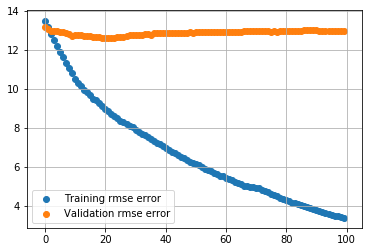

In [172]:
plt.scatter(list(range(n_iter)), results['validation_0']['rmse'], label='Training rmse error')
plt.scatter(list(range(n_iter)), results['validation_1']['rmse'], label='Validation rmse error')
plt.grid(True)
plt.legend()

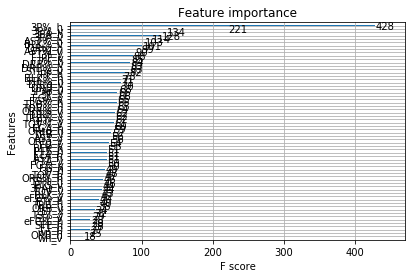

In [173]:
xgb.plot_importance(xgb_reg)

In [178]:
y_pred = xgb_reg.predict(X_val)

In [183]:
y_p = y_pred>0
y_p

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True, False,  True,  True, False,  True, False,
       False,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
        True, False,  True, False,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,

In [184]:
y_t = y_val>0
y_t

1430     True
369      True
1858    False
575     False
945      True
1466     True
1316     True
236      True
462      True
1199    False
951     False
1644     True
1494     True
382     False
142     False
1695     True
1335     True
1538    False
246     False
268     False
546      True
1544    False
1048     True
1655    False
1127     True
571     False
431     False
1658     True
1722     True
1867    False
        ...  
690      True
1448    False
470      True
318      True
1638    False
1440     True
1358    False
1042     True
111      True
476      True
272      True
185     False
1870    False
916      True
1513    False
1091     True
1431    False
40       True
909     False
1565     True
930     False
1374    False
1336     True
1606     True
885      True
71       True
1812     True
1767     True
1528     True
1810     True
Name: home_win_score, Length: 378, dtype: bool

In [186]:
sum(y_p == y_t)/len(y_p)

0.6111111111111112

# Player Stats

    Rk -- Rank
    Pos -- Position
    Age -- Age of Player at the start of February 1st of that season.
    Tm -- Team
    G -- Games
    GS -- Games Started
    MP -- Minutes Played Per Game
    FG -- Field Goals Per Game
    FGA -- Field Goal Attempts Per Game
    FG% -- Field Goal Percentage
    3P -- 3-Point Field Goals Per Game
    3PA -- 3-Point Field Goal Attempts Per Game
    3P% -- FG% on 3-Pt FGAs.
    2P -- 2-Point Field Goals Per Game
    2PA -- 2-Point Field Goal Attempts Per Game
    2P% -- FG% on 2-Pt FGAs.
    eFG% -- Effective Field Goal Percentage
    This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
    FT -- Free Throws Per Game
    FTA -- Free Throw Attempts Per Game
    FT% -- Free Throw Percentage
    ORB -- Offensive Rebounds Per Game
    DRB -- Defensive Rebounds Per Game
    TRB -- Total Rebounds Per Game
    AST -- Assists Per Game
    STL -- Steals Per Game
    BLK -- Blocks Per Game
    TOV -- Turnovers Per Game
    PF -- Personal Fouls Per Game
    PTS -- Points Per Game

In [28]:
to_num_list = ['Rk', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

In [29]:
years = [2019,2018,2017,2016,2015]
player_stats = {}
for year in years:
    url = 'https://www.basketball-reference.com/leagues/NBA_'+str(year)+'_per_game.html'
    html = requests.get(url).content
    df_list = pd.read_html(html)
    df = df_list[0]
    df.drop(df[df.Rk=='Rk'].index, inplace=True)
    df[to_num_list] = df[to_num_list].apply(pd.to_numeric)
    player_stats[year] = df

In [30]:
player_stats[2019]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Alex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
5,6,Deng Adel,SF,21,CLE,19,3,10.2,0.6,1.9,...,1.000,0.2,0.8,1.0,0.3,0.1,0.2,0.3,0.7,1.7
6,7,DeVaughn Akoon-Purcell,SG,25,DEN,7,0,3.1,0.4,1.4,...,0.500,0.1,0.4,0.6,0.9,0.3,0.0,0.3,0.6,1.0
7,8,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,...,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
8,9,Rawle Alkins,SG,21,CHI,10,1,12.0,1.3,3.9,...,0.667,1.1,1.5,2.6,1.3,0.1,0.0,0.8,0.7,3.7
9,10,Grayson Allen,SG,23,UTA,38,2,10.9,1.8,4.7,...,0.750,0.1,0.5,0.6,0.7,0.2,0.2,0.9,1.2,5.6


In [32]:
player_stats[2019].sort_values(by=['PTS'], inplace=True, ascending=False)

In [34]:
player_stats[2019].head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
277,206,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1
249,183,Paul George,SF,28,OKC,77,77,36.9,9.2,21.0,...,0.839,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0
19,18,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,...,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
207,155,Joel Embiid,C,24,PHI,64,64,33.7,9.1,18.7,...,0.804,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5
344,258,LeBron James,SF,34,LAL,55,55,35.2,10.1,19.9,...,0.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4
165,124,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,...,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3
71,61,Devin Booker,SG,22,PHO,64,64,35.0,9.2,19.6,...,0.866,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6
412,301,Kawhi Leonard,SF,27,TOR,60,60,34.0,9.3,18.8,...,0.854,1.3,6.0,7.3,3.3,1.8,0.4,2.0,1.5,26.6
198,150,Kevin Durant,PF,30,GSW,78,78,34.6,9.2,17.7,...,0.885,0.4,5.9,6.4,5.9,0.7,1.1,2.9,2.0,26.0
167,126,Anthony Davis,C,25,NOP,56,56,33.0,9.5,18.3,...,0.794,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9


# MVP Voting

    Age -- Age of Player at the start of February 1st of that season.
    Tm -- Team
    Voting
    First -- First Place Votes
    Totals
    G -- Games
    Per Game
    MP -- Minutes Played Per Game
    PTS -- Points Per Game
    TRB -- Total Rebounds Per Game
    AST -- Assists Per Game
    STL -- Steals Per Game
    BLK -- Blocks Per Game
    Shooting
    FG% -- Field Goal Percentage
    3P% -- 3-Point Field Goal Percentage
    FT% -- Free Throw Percentage
    Advanced
    WS -- Win Shares
    An estimate of the number of wins contributed by a player.
    WS/48 -- Win Shares Per 48 Minutes
    An estimate of the number of wins contributed by a player per 48 minutes (league average is approximately .100)

In [3]:
to_num_list = ['Age', 'First', 'Pts Won', 'Pts Max', 'Share', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48']


In [4]:
years = range(2000,2019)
MVP_voting = {}
for year in years:
    url = 'https://www.basketball-reference.com/awards/awards_'+str(year)+'.html'
    html = requests.get(url).content
    df_list = pd.read_html(html)
    df = df_list[0]
    df.columns = df.columns.droplevel()
    df[to_num_list] = df[to_num_list].apply(pd.to_numeric)
    df.drop("Rank", axis=1, inplace=True)
    MVP_voting[year] = df

In [7]:
MVP_votings = pd.DataFrame()
for year in range(2009,2019):
    MVP_votings = MVP_votings.append(MVP_voting[year], ignore_index=True, sort=False)

In [8]:
MVP_votings

,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,LeBron James,24,CLE,109.0,1172.0,1210,0.969,81,37.7,28.4,7.6,7.2,1.7,1.1,0.489,0.344,0.780,20.3,0.318
1,Kobe Bryant,30,LAL,2.0,698.0,1210,0.577,82,36.1,26.8,5.2,4.9,1.5,0.5,0.467,0.351,0.856,12.7,0.206
2,Dwyane Wade,27,MIA,7.0,680.0,1210,0.562,79,38.6,30.2,5.0,7.5,2.2,1.3,0.491,0.317,0.765,14.7,0.232
3,Dwight Howard,23,ORL,1.0,328.0,1210,0.271,79,35.7,20.6,13.8,1.4,1.0,2.9,0.572,0.000,0.594,13.8,0.234
4,Chris Paul,23,NOH,2.0,192.0,1210,0.159,78,38.5,22.8,5.5,11.0,2.8,0.1,0.503,0.364,0.868,18.3,0.292
5,Chauncey Billups,32,TOT,0.0,33.0,1210,0.027,79,35.3,17.7,3.0,6.4,1.2,0.2,0.418,0.408,0.913,10.1,0.174
6,Paul Pierce,31,BOS,0.0,21.0,1210,0.017,81,37.5,20.5,5.6,3.6,1.0,0.3,0.457,0.391,0.830,10.3,0.164
7,Tony Parker,26,SAS,0.0,9.0,1210,0.007,72,34.1,22.0,3.1,6.9,0.9,0.1,0.506,0.292,0.782,8.6,0.168
8,Brandon Roy,24,POR,0.0,7.0,1210,0.006,78,37.2,22.6,4.7,5.1,1.1,0.3,0.480,0.377,0.824,13.5,0.223
9,Dirk Nowitzki,30,DAL,0.0,3.0,1210,0.002,81,37.7,25.9,8.4,2.4,0.8,0.8,0.479,0.359,0.890,10.9,0.171


In [65]:
X = MVP_votings.drop(labels=['Player', 'Tm', 'First', 'Pts Won', 'Pts Max'], axis= 1)
y = MVP_votings['Pts Won']

In [66]:
random_state = 2
train_X, test_X, train_y, test_y =  train_test_split(X, y, test_size=.2, random_state=random_state)

In [67]:
gamma = np.linspace(1e-2,1e-4, 2)
C= np.linspace(1, 1000, 2)
hyper_parameters = [{'kernel': ['rbf'], 'gamma': gamma,
                     'C': C},
                    {'kernel': ['linear'], 'C': C}]

In [68]:
#clf = GridSearchCV(SVC(), hyper_parameters, scoring='accuracy',cv=5,n_jobs=-1)
clf = LogisticRegressionCV(cv=5,max_iter=200)

In [69]:
clf.fit(train_X,train_y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarni

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=200,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [29]:
clf.best_estimator_

AttributeError: 'LogisticRegressionCV' object has no attribute 'best_estimator_'

In [70]:
clf.score(test_X,test_y)

0.14814814814814814

In [71]:
x_pred = MVP_voting[2011].drop(labels=['Player', 'Tm', 'First', 'Pts Won', 'Pts Max'], axis= 1)

In [72]:
clf.predict(x_pred)

array([3., 3., 3., 3., 1., 1., 3., 1., 1., 1., 1., 1., 3.])

In [64]:
MVP_voting[2009]

,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,LeBron James,24,CLE,109.0,1172.0,1210,0.969,81,37.7,28.4,7.6,7.2,1.7,1.1,0.489,0.344,0.780,20.3,0.318
1,Kobe Bryant,30,LAL,2.0,698.0,1210,0.577,82,36.1,26.8,5.2,4.9,1.5,0.5,0.467,0.351,0.856,12.7,0.206
2,Dwyane Wade,27,MIA,7.0,680.0,1210,0.562,79,38.6,30.2,5.0,7.5,2.2,1.3,0.491,0.317,0.765,14.7,0.232
3,Dwight Howard,23,ORL,1.0,328.0,1210,0.271,79,35.7,20.6,13.8,1.4,1.0,2.9,0.572,0.000,0.594,13.8,0.234
4,Chris Paul,23,NOH,2.0,192.0,1210,0.159,78,38.5,22.8,5.5,11.0,2.8,0.1,0.503,0.364,0.868,18.3,0.292
5,Chauncey Billups,32,TOT,0.0,33.0,1210,0.027,79,35.3,17.7,3.0,6.4,1.2,0.2,0.418,0.408,0.913,10.1,0.174
6,Paul Pierce,31,BOS,0.0,21.0,1210,0.017,81,37.5,20.5,5.6,3.6,1.0,0.3,0.457,0.391,0.830,10.3,0.164
7,Tony Parker,26,SAS,0.0,9.0,1210,0.007,72,34.1,22.0,3.1,6.9,0.9,0.1,0.506,0.292,0.782,8.6,0.168
8,Brandon Roy,24,POR,0.0,7.0,1210,0.006,78,37.2,22.6,4.7,5.1,1.1,0.3,0.480,0.377,0.824,13.5,0.223
9,Dirk Nowitzki,30,DAL,0.0,3.0,1210,0.002,81,37.7,25.9,8.4,2.4,0.8,0.8,0.479,0.359,0.890,10.9,0.171
